# Metrics

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
metrics = torch.load('../metrics/metrics-all-20200430-214535.pt')

## Training time plots

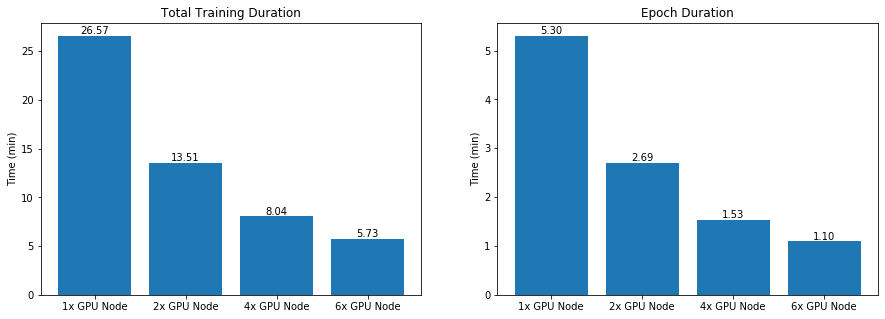

In [3]:
# Bar plots
# From matplotlib examples
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

labels = []
epochs = []
totals = []
for m in metrics:
    label = '{0}x GPU Node'.format(m['world_size'])
    labels.append(label)
    epochs.append(m['epoch_time']/60)
    totals.append(m['train_time']/60)

rects1 = ax1.bar(labels, totals)
ax1.set_title('Total Training Duration')
ax1.set_ylabel('Time (min)')

rects2 = ax2.bar(labels, epochs)
ax2.set_title('Epoch Duration')
ax2.set_ylabel('Time (min)')

autolabel(rects1, ax1)
autolabel(rects2, ax2)

## Training error traces

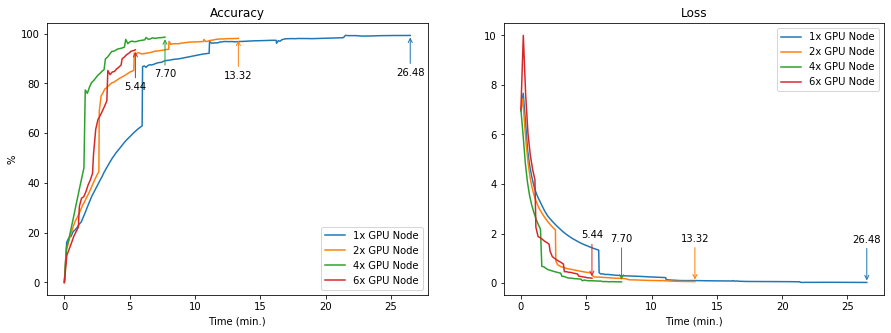

In [4]:
def auto_endline(ax, below):
    vert = 40
    
    if below:
        vert *= -1
    
    for line in ax.get_lines():
        end = line.get_xdata()[-1]
        y = line.get_ydata()[-1]
        ax.annotate('{:.2f}'.format(end),
            xy=(end, y), xycoords='data',
            xytext=(0, vert), textcoords='offset points', ha='center',
            arrowprops=dict(color=line.get_color(), arrowstyle='->'))

# Trace plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for m in metrics:
    t = [(t - m['trace']['t'][0]) / 60 for t in m['trace']['t']]
    label = '{0}x GPU Node'.format(m['world_size'])
    ax1.plot(t, m['trace']['top1'], label=label)
    ax2.plot(t, m['trace']['losses'], label=label)
    
ax1.set_title('Accuracy')
ax1.set_xlabel('Time (min.)')
ax1.set_ylabel('%')
ax1.legend()
ax2.set_title('Loss')
ax2.set_xlabel('Time (min.)')
ax2.legend()

auto_endline(ax1, below=True)
auto_endline(ax2, below=False)